Business Understanding: 
Recently I was interested in what kind of people will buy a perfume and which kind of perfume is more populor.
so i use some research to get the data from one of the biggest perfume dealer and try to find some insight.

Data Understanding:
data is the 2018 some perfume dealer's sales data.
inclouding the date,brand,product,amount and quantity of sales, more important, is it a member sales. 

Prepare Data: 
import the necessary library and load the data.
i need two dataframe: all the sales and the member sales

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
##load the data
df = pd.read_csv("CSVFile_2019-01-23T18_06_44.csv",encoding='GBK')
df.head() ##all the sales

,TXD_Date,MemberID,Age,Sex,ClassName_1,ClassName_2,ProductName,Quantity,AmountPortion
0,20180518,0.0,0.0,NaN,安娜苏,彩妆,安娜苏星幻闪彩霜300 7.5g,1,188.35
1,20180518,0.0,0.0,NaN,红地球,护肤,嫣妮花蜜养颜啫喱 U01 50ml,1,205.86
2,20180516,0.0,0.0,NaN,物料,样品,浪凡花韵香水小样板 2ml,0,0.00
3,20180516,0.0,0.0,NaN,物料,样品,浪凡花韵香水小样板 2ml,0,0.00
4,20180516,0.0,0.0,NaN,普拉达,香水,普拉达花花小姐女士淡香水 80ml,1,1020.00


In [6]:
##clean the data:choose the data which className_2 = '香水'
##df[df['MemberID'].isin([0])] 切片器运用

df = df[df['ClassName_2'].isin(['香水'])]
df = df[df['AmountPortion'] >0]
df.head()

,TXD_Date,MemberID,Age,Sex,ClassName_1,ClassName_2,ProductName,Quantity,AmountPortion
4,20180516,0.0,0.0,NaN,普拉达,香水,普拉达花花小姐女士淡香水 80ml,1,1020.0
5,20180516,0.0,0.0,NaN,万宝龙,香水,万宝龙荣耀之星男士淡香水 40ml,1,380.0
6,20180518,0.0,0.0,NaN,博柏利,香水,博柏利动感节拍女士淡香氛 30ml,1,480.0
7,20180518,0.0,0.0,NaN,博柏利,香水,博柏利动感节拍女士淡香氛 30ml,1,384.0
8,20180520,0.0,0.0,NaN,宝格丽,香水,宝格丽夜幽男士香氛 50ml,1,525.0


In [7]:
df_member = df[~df['MemberID'].isin([0])]
df_member.describe()##the member sales

,TXD_Date,MemberID,Age,Quantity,AmountPortion
count,7.375500e+04,7.375000e+04,73750.000000,73755.000000,73755.000000
mean,2.018060e+07,1.337725e+06,45.009125,1.095316,688.182686
std,3.616471e+02,6.535020e+05,37.737531,0.852856,562.543402
min,2.018010e+07,2.100000e+01,0.000000,1.000000,11.000000
25%,2.018030e+07,1.589534e+06,21.000000,1.000000,455.575000
50%,2.018052e+07,1.652858e+06,29.000000,1.000000,627.950000
75%,2.018093e+07,1.674669e+06,43.000000,1.000000,810.000000
max,2.018123e+07,1.903938e+06,119.000000,80.000000,45580.000000


Data Modeling
now i start to figure out some information for my analyst

In [8]:
##describe the data
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263871 entries, 4 to 920664
Data columns (total 9 columns):
TXD_Date         263871 non-null int64
MemberID         263866 non-null float64
Age              263866 non-null float64
Sex              73750 non-null object
ClassName_1      263871 non-null object
ClassName_2      263871 non-null object
ProductName      263871 non-null object
Quantity         263871 non-null int64
AmountPortion    263871 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 20.1+ MB


In [9]:
##判定数据总数
df.Age.count()

263866

In [10]:
##判定总金额
sum(df.AmountPortion)

194889381.67999798

In [11]:
df.Age[~df['MemberID'].isin([0])].count()
##会员购买数据为73755条，占比

73750

In [12]:
## 会员购买总金额
sum(df.AmountPortion[~df['MemberID'].isin([0])])

50756913.97000038

In [13]:
##占比
a=df.Age[~df['MemberID'].isin([0])].count()/df.Age.count()
b=sum(df.AmountPortion[~df['MemberID'].isin([0])])/sum(df.AmountPortion)
print(a,b)

0.27949792697808734 0.2604396069835225


In [14]:
df_member = df_member.fillna('Unknown') ## 数据体量较少，用未知代替空值，不丢失数据

In [15]:
##用户购买次数平均
df_member.MemberID.value_counts().mean()

2.365382765145441

In [16]:
##客单价
df_member.AmountPortion.mean()

688.1826855128518

Evaluate the Results
now i will visualization the results

In [38]:
df_bar = df_member.Age.replace([0,1,2,3,4,5,6,7,8,9,10],' 10')
df_bar = df_bar.replace([10,11,12,13,14,15,16,17,18,19],'10~19')
df_bar = df_bar.replace([20,21,22,23,24,25],'20~25')
df_bar = df_bar.replace([26,27,28,29,30],'26~30')
df_bar = df_bar.replace([31,32,33,34,35],'31~35')
df_bar = df_bar.replace([36,37,38,39,40],'36~40')
df_bar = df_bar.replace([40,41,42,43,44,45,46,47,48,49,50],'40~50')
df_bar = df_bar.replace([51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,73,75,76,78,81],'50')
df_bar = df_bar.replace(119,'Unknown')
df_bar = df_bar.value_counts()

df_bar = df_bar.sort_index()


<BarContainer object of 9 artists>

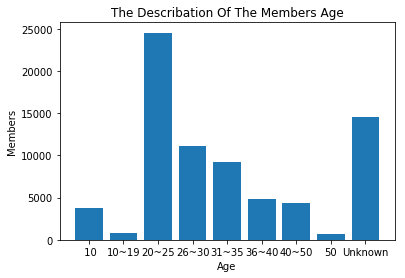

In [53]:
labels   = df_bar.index.tolist()
 
quants   = df_bar.values.tolist()
plt.xlabel('Age')
plt.ylabel('Members')
plt.title('The Describation Of The Members Age')
plt.bar(labels,quants)

([<matplotlib.patches.Wedge at 0x17c91fe33c8>,
 [Text(-1.15848,-0.312915,'female'),
  Text(1.11028,0.299641,'male'),
  Text(0.739393,0.880794,'Unknown')],
 [Text(-0.675782,-0.182534,'80.6%'),
  Text(0.627548,0.169362,'19.4%'),
  Text(0.417918,0.49784,'0.0%')])

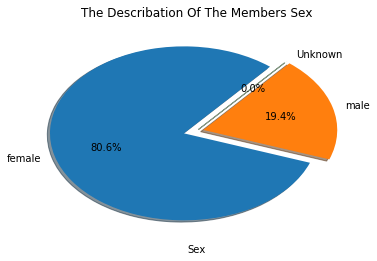

In [55]:
df_pie = df_member.Sex.value_counts()
labels=['female','male','Unknown']
explode=0.1,0.05,0.05
plt.title('The Describation Of The Members Sex')
plt.pie(df_pie,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)

In [45]:
df_pie2 = df_member.ClassName_1.value_counts()
df_pie2

宝格丽        17579
范思哲        12487
博柏利        10709
安娜苏         7114
普拉达         6617
爱马仕         6565
浪凡          5266
蔻驰          4932
万宝龙          905
华伦天奴         838
盖璞           184
丽娜蕙姿         165
梵克雅宝         137
雾仙浓           58
杜嘉班纳          54
登喜路           46
都彭            34
吉米周           19
ETERNAL       14
杜鲁萨迪           8
巴尔曼            6
卡地亚            6
博斯             6
罗伯特卡沃利         3
莱俪             2
卡罗琳娜           1
Name: ClassName_1, dtype: int64

([<matplotlib.patches.Wedge at 0x17c9202d898>,
 [Text(-0.0556862,1.09859,'BVLGARI'),
  Text(-1.0686,0.260928,'versace'),
  Text(-0.805949,-0.748629,'Burberry'),
  Text(-0.0693455,-1.09781,'Anna Sui'),
  Text(0.548275,-0.953622,'Prada'),
  Text(0.971847,-0.515281,'Hermès'),
  Text(1.09985,0.0180616,'lanvin'),
  Text(0.990107,0.479258,'COACH'),
  Text(0.792168,0.763197,'Others ')],
 [Text(-0.0303743,0.599231,'23.8%'),
  Text(-0.582875,0.142324,'16.9%'),
  Text(-0.439609,-0.408343,'14.5%'),
  Text(-0.0378248,-0.598807,'9.6%'),
  Text(0.299059,-0.520157,'9.0%'),
  Text(0.530098,-0.281062,'8.9%'),
  Text(0.599919,0.00985176,'7.1%'),
  Text(0.540058,0.261414,'6.7%'),
  Text(0.432092,0.416289,'3.4%')])

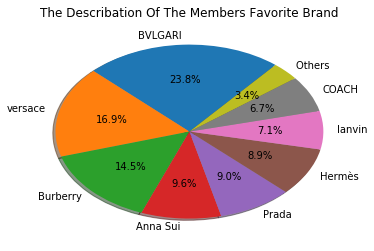

In [56]:
##为了更好地观测，进行数据清洗，将数量较少的品牌统一为others
df_pie2 = df_member.ClassName_1.replace("万宝龙","others").replace("华伦天奴","others").replace("盖璞","others").replace("丽娜蕙姿","others").replace("梵克雅宝","others").replace("登喜路","others").replace("都彭","others").replace("吉米周","others").replace("ETERNAL","others").replace("杜鲁萨迪","others").replace("巴尔曼","others").replace("雾仙浓","others").replace("杜嘉班纳","others").replace("博斯","others").replace("卡地亚","others").replace("罗伯特卡沃利","others").replace("莱俪","others").replace("卡罗琳娜","others")
df_pie2 =df_pie2.value_counts()
labels = ['BVLGARI' ,'versace','Burberry','Anna Sui','Prada','Hermès','lanvin' ,'COACH','Others ']

plt.title('The Describation Of The Members Favorite Brand')
plt.pie(df_pie2,labels=labels,autopct='%1.1f%%',shadow=True,startangle=50)

In [47]:
col_n = ['ProductName','Quantity','AmountPortion']
a = pd.DataFrame(df_member,columns = col_n)
a1=a.groupby(['ProductName']).sum()
a1 = pd.DataFrame(a1)
a1.sort_values(by = ['AmountPortion','Quantity'],ascending= False).head()

,Quantity,AmountPortion
ProductName,,
宝格丽碧蓝男士淡香水套装（淡香水100ml+洗,1616,1219620.82
安娜苏筑梦天马淡香水 50ml,1544,776229.25
浪凡光韵女士浓香水 100ml,910,649006.95
范思哲晶钻女士香水 90ml,989,638132.30
宝格丽晶莹女士淡香水套装（淡香水40ml+身,1072,623703.28
